# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
bc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
bc_df.shape

(699, 11)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
bc_df.shape

(699, 11)

In [7]:
bc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [9]:
bc_df.mean()

ID                             1.071704e+06
ClumpThickness                 4.417740e+00
Cell Size                      3.134478e+00
Cell Shape                     3.207439e+00
Marginal Adhesion              2.806867e+00
Single Epithelial Cell Size    3.216023e+00
Normal Nucleoli                3.437768e+00
Bland Chromatin                2.866953e+00
Mitoses                        1.589413e+00
Class                          2.689557e+00
dtype: float64

In [10]:
bc_df.median()

ID                             1171710.0
ClumpThickness                       4.0
Cell Size                            1.0
Cell Shape                           1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Normal Nucleoli                      3.0
Bland Chromatin                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

In [11]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [12]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
bc_df=bc_df.replace('?',np.nan)

In [13]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
bc_df.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
bc_df=bc_df.replace(np.nan,'1')

In [15]:
bc_df.duplicated().sum()

9

In [16]:
bc_df.drop_duplicates(inplace=True)

In [17]:
bc_df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [18]:
# Check for correlation of variable
bc_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.620526,0.633880,0.482517,0.681063
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.343769,0.427490,1.000000,0.423947
Class,-0.080084,0.716812,0.817586,0.817551,0.701175,0.681063,0.756736,0.715363,0.423947,1.000000


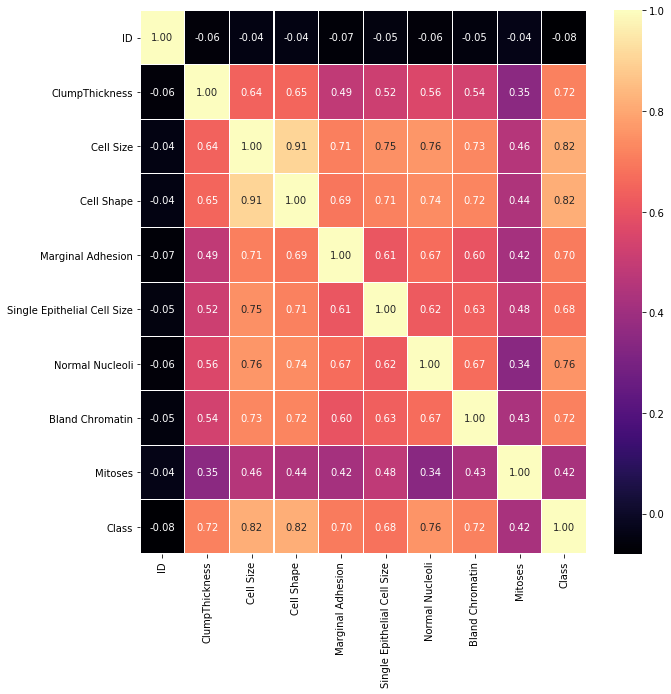

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(bc_df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [20]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [21]:
#Let us check for pair plots

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


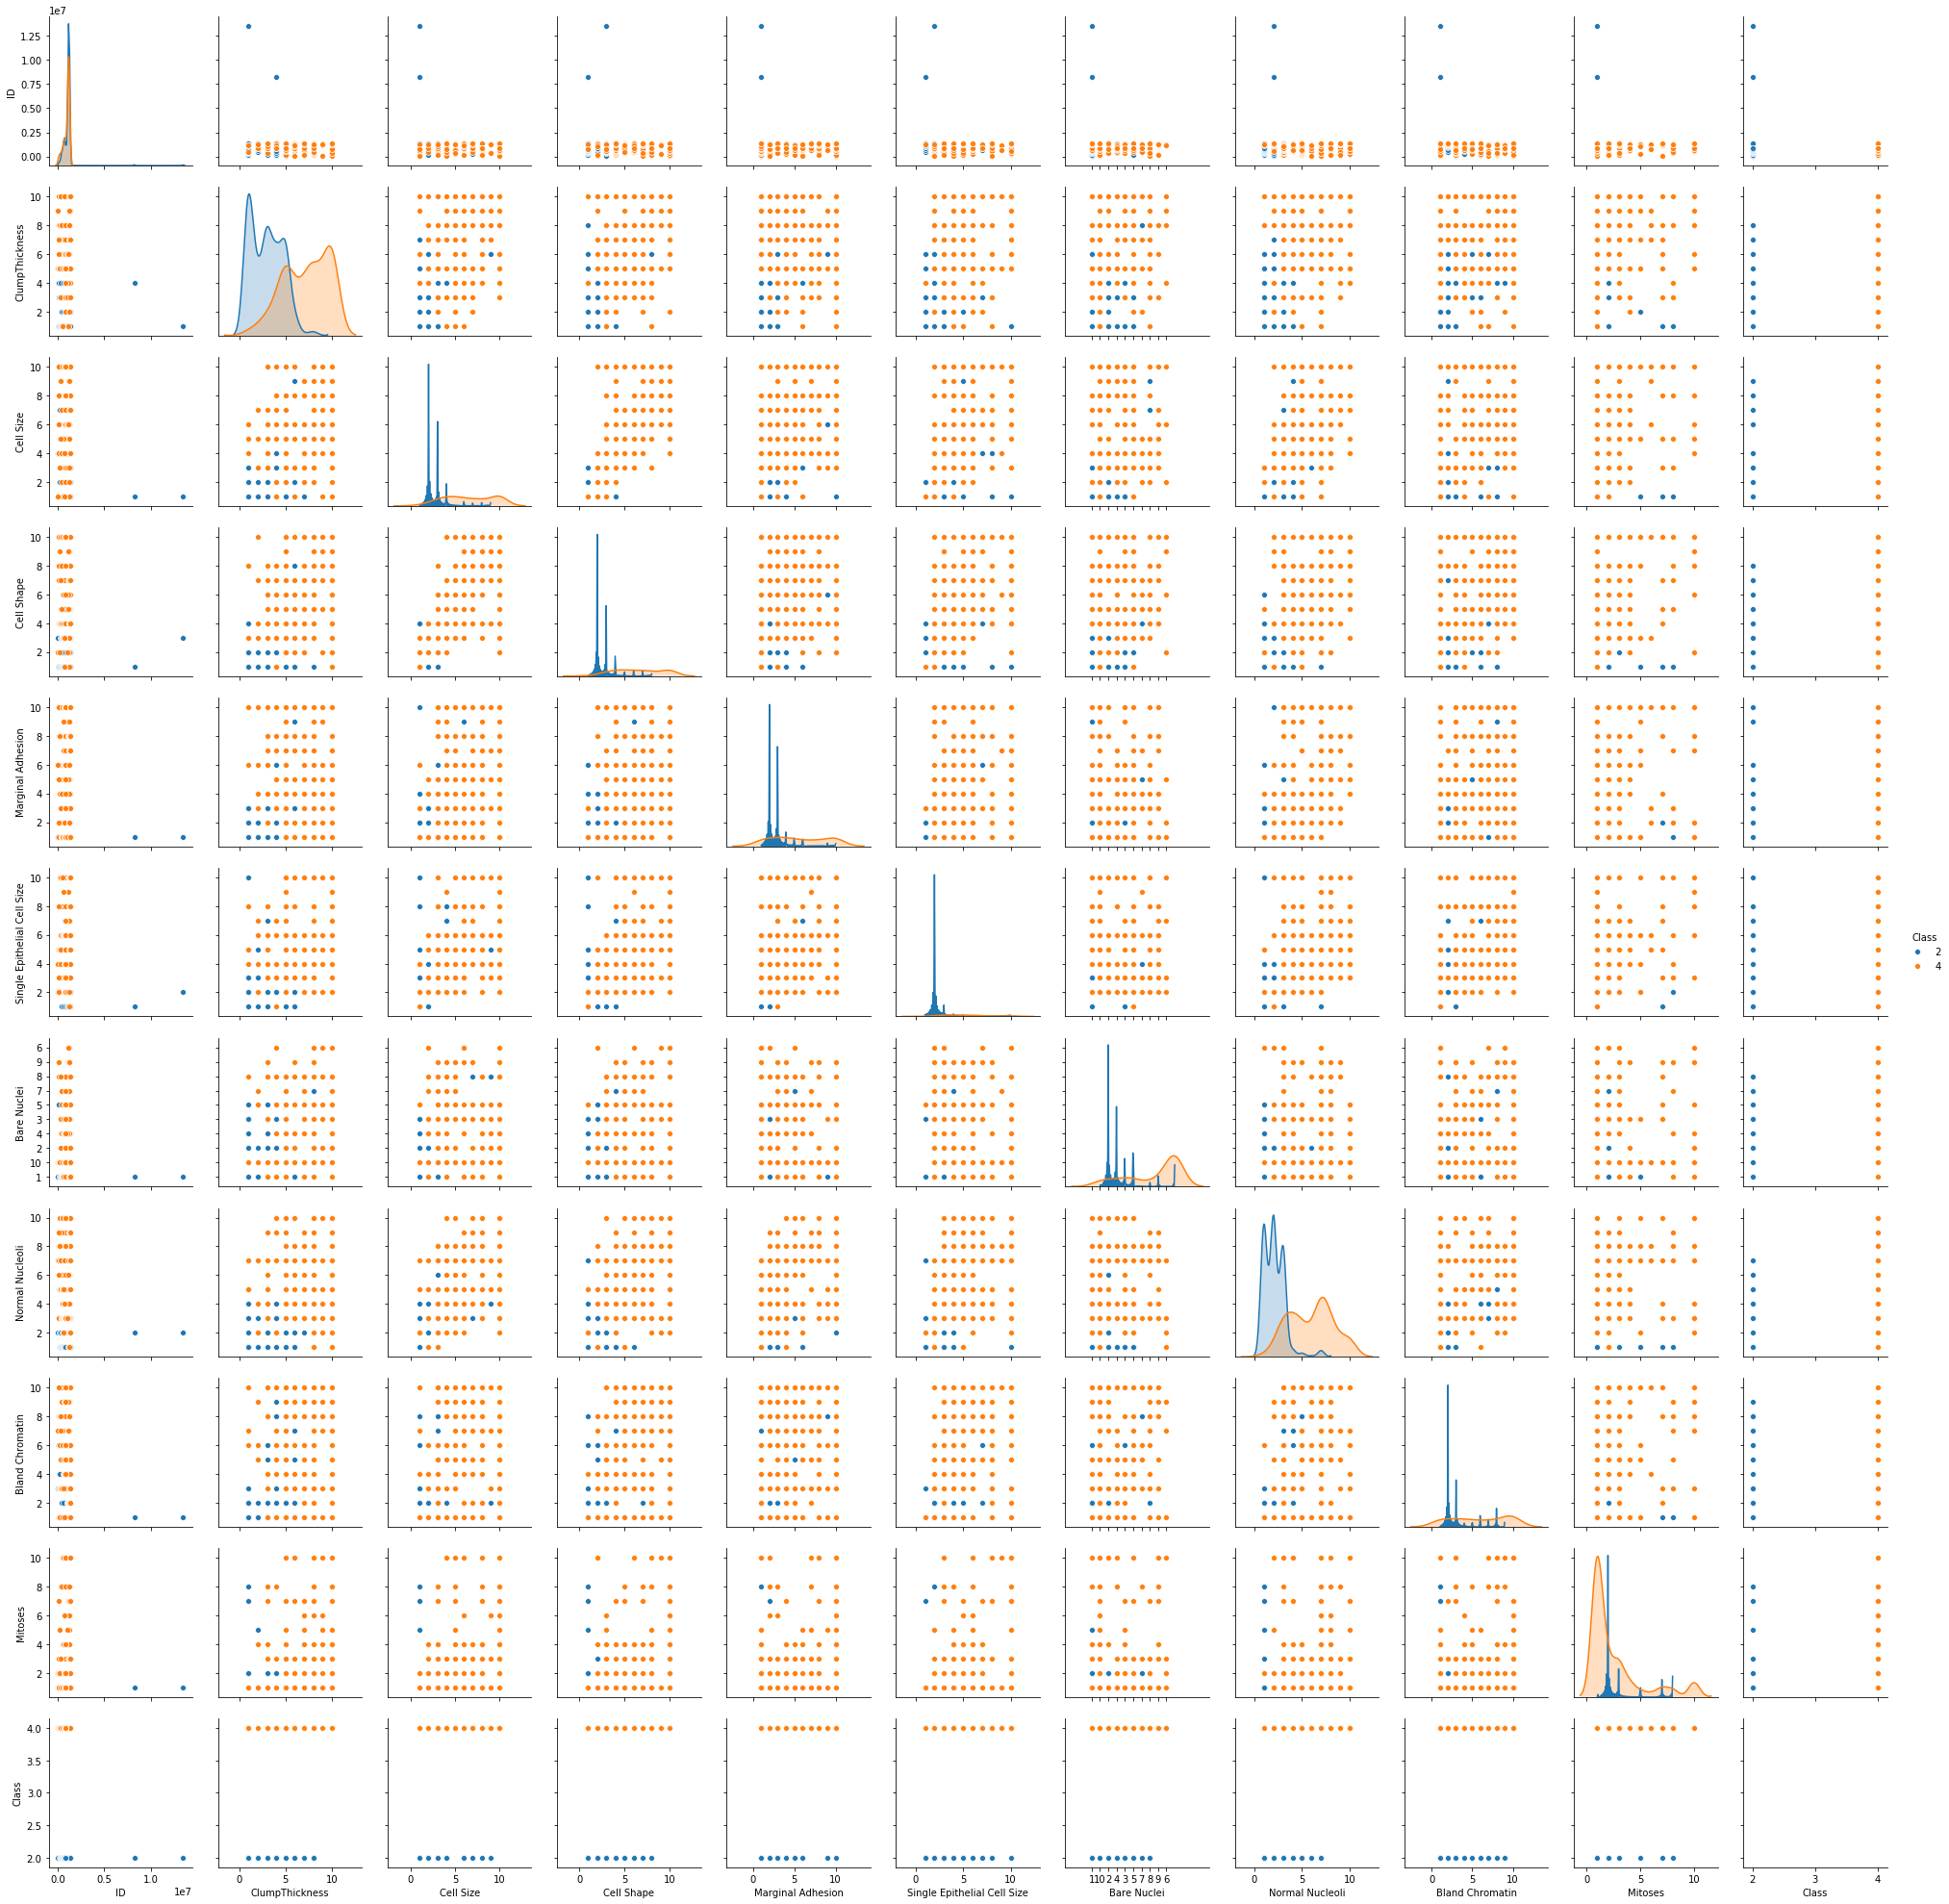

In [22]:
sns.pairplot(bc_df,hue='Class')

In [23]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [24]:
# We could see most of the outliers are now removed.

In [25]:
bc_df_analysis=bc_df.drop(labels=['Class','ID'],axis=1)

In [26]:
bc_df_analysis['Bare Nuclei']=bc_df['Bare Nuclei'].astype('int64')

ClumpThickness                    AxesSubplot(0.125,0.125;0.0731132x0.755)
Cell Size                      AxesSubplot(0.212736,0.125;0.0731132x0.755)
Cell Shape                     AxesSubplot(0.300472,0.125;0.0731132x0.755)
Marginal Adhesion              AxesSubplot(0.388208,0.125;0.0731132x0.755)
Single Epithelial Cell Size    AxesSubplot(0.475943,0.125;0.0731132x0.755)
Bare Nuclei                    AxesSubplot(0.563679,0.125;0.0731132x0.755)
Normal Nucleoli                AxesSubplot(0.651415,0.125;0.0731132x0.755)
Bland Chromatin                AxesSubplot(0.739151,0.125;0.0731132x0.755)
Mitoses                        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

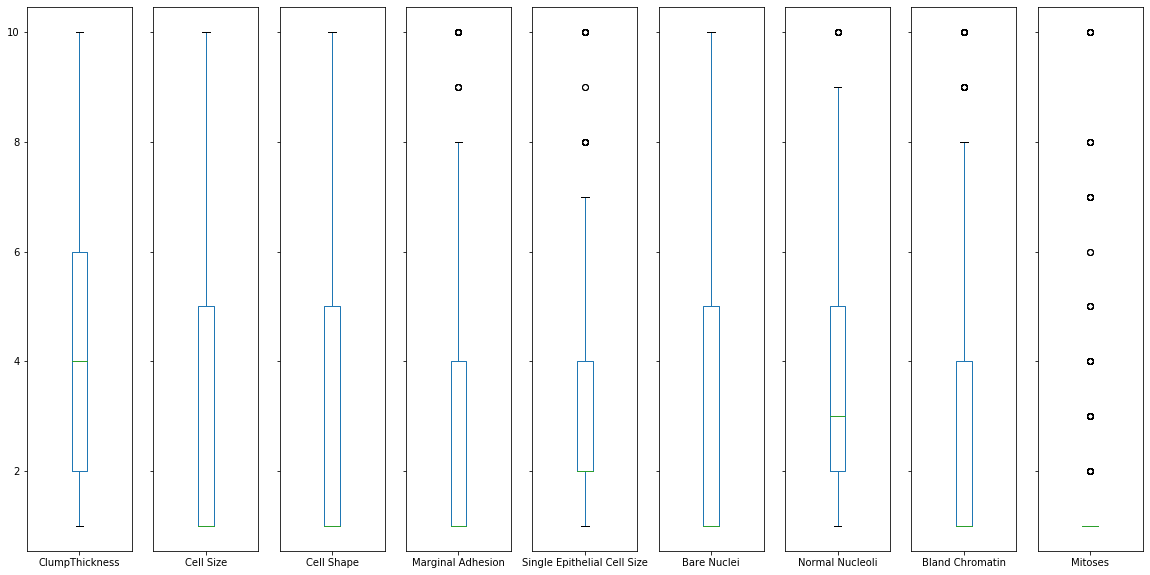

In [27]:
bc_df_analysis.plot(kind='box',subplots=True,sharex=True,sharey=True,figsize=(20,10))

In [28]:
pd.crosstab(bc_df['Marginal Adhesion'],bc_df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [29]:
bc_df['Marginal Adhesion']=np.where(bc_df['Marginal Adhesion'].astype('int64')>4,4,bc_df['Marginal Adhesion'])

In [30]:
pd.crosstab(bc_df['Single Epithelial Cell Size'],bc_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [31]:
bc_df['Single Epithelial Cell Size']=np.where(bc_df['Single Epithelial Cell Size']>4,4,bc_df['Single Epithelial Cell Size'])

In [32]:
pd.crosstab(bc_df['Normal Nucleoli'],bc_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [33]:
pd.crosstab(bc_df['Bare Nuclei'],bc_df['Class'])

Class,2,4
Bare Nuclei,,
1,395,17
10,3,127
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18


In [34]:
bc_df['Bare Nuclei']=np.where(bc_df['Bare Nuclei'].astype('int64')>5,5,bc_df['Bare Nuclei'])

In [35]:
bc_df['Normal Nucleoli']=np.where(bc_df['Normal Nucleoli']>5,5,bc_df['Normal Nucleoli'])

In [36]:
pd.crosstab(bc_df['Bland Chromatin'],bc_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [37]:
bc_df['Bland Chromatin']=np.where(bc_df['Bland Chromatin']>4,4,bc_df['Bland Chromatin'])

In [38]:
pd.crosstab(bc_df['Mitoses'],bc_df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [39]:
bc_df['Mitoses']=np.where(bc_df['Mitoses']>1,1,bc_df['Mitoses'])

# Q6 Create a covariance matrix for identifying Principal components

In [40]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=np.cov(bc_df_analysis.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 7.93762016  5.51311079  5.45212343  3.94056499  3.20745883  6.01908248
   3.8633895   4.62828716  1.70118424]
 [ 5.51311079  9.25650701  8.15558781  6.22041606  5.00203193  7.53352685
   5.64857281  6.78597     2.41267537]
 [ 5.45212343  8.15558781  8.76659936  5.86548243  4.65451505  7.54129488
   5.34468985  6.58075977  2.24850129]
 [ 3.94056499  6.22041606  5.86548243  8.22420437  3.83940809  6.97595128
   4.69508214  5.29807745  2.0619886 ]
 [ 3.20745883  5.00203193  4.65451505  3.83940809  4.84424181  4.62127217
   3.33798826  4.27987001  1.83113523]
 [ 6.01908248  7.53352685  7.54129488  6.97595128  4.62127217 13.08315139
   5.94736543  6.41527734  2.1380703 ]
 [ 3.8633895   5.64857281  5.34468985  4.69508214  3.33798826  5.94736543
   5.97343135  5.01663617  1.4486864 ]
 [ 4.62828716  6.78597     6.58075977  5.29807745  4.27987001  6.41527734
   5.01663617  9.410675    2.26116405]
 [ 1.70118424  2.41267537  2.24850129  2.0619886   1.83113523  2.1380703
 

# Q7 Identify eigen values and eigen vector

In [41]:
# Step 2- Get eigen values and eigen vector

In [42]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.29790598 -0.07834808 -0.85683651  0.00657187 -0.11349478 -0.35757784
   0.14500322  0.09070937  0.03007501]
 [-0.40288343  0.22830231 -0.01508952  0.72706067 -0.26033305  0.380397
   0.01086168 -0.1042574  -0.18236044]
 [-0.39036924  0.16909421 -0.06620179 -0.6670993  -0.17336622  0.41011346
   0.00551808 -0.20233606 -0.36110334]
 [-0.33486161 -0.10691758  0.47574671 -0.04050256 -0.43812425 -0.56125503
   0.31263819  0.10440176 -0.18126917]
 [-0.24788681  0.18578596  0.06563439 -0.11388407 -0.17216447  0.10210995
  -0.43183818  0.74290589  0.32908635]
 [-0.43846304 -0.78277369  0.09229095  0.05683074  0.32754148  0.10435281
  -0.24978568 -0.01112784 -0.05077907]
 [-0.29337155  0.02271213  0.09795858 -0.08703664  0.03922063  0.17300301
   0.43434565 -0.23661303  0.78748706]
 [-0.35940496  0.47756049  0.10737837  0.02680749  0.72815635 -0.27209769
   0.04832997  0.05376376 -0.14505221]
 [-0.12441877  0.16088652  0.03056792 -0.01357659 -0.16930143 -0.34489536
  -0.6

In [43]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(48.59392186099305, array([-0.29790598, -0.40288343, -0.39036924, -0.33486161, -0.24788681,
       -0.43846304, -0.29337155, -0.35940496, -0.12441877])), (5.189439495632338, array([-0.07834808,  0.22830231,  0.16909421, -0.10691758,  0.18578596,
       -0.78277369,  0.02271213,  0.47756049,  0.16088652])), (4.291605545993134, array([-0.85683651, -0.01508952, -0.06620179,  0.47574671,  0.06563439,
        0.09229095,  0.09795858,  0.10737837,  0.03056792])), (3.1268169883429073, array([-0.11349478, -0.26033305, -0.17336622, -0.43812425, -0.17216447,
        0.32754148,  0.03922063,  0.72815635, -0.16930143])), (2.6257110179809833, array([-0.35757784,  0.380397  ,  0.41011346, -0.56125503,  0.10210995,
        0.10435281,  0.17300301, -0.27209769, -0.34489536])), (2.4556182280184813, array([ 0.14500322,  0.01086168,  0.00551808,  0.31263819, -0.43183818,
       -0.24978568,  0.43434565,  0.04832997, -0.66423939])), (1.782285744189613, array([ 0.03007501, -0.18236044, -0.36110334, -0.181

# Q8 Find variance and cumulative variance by each eigen vector

In [44]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)

In [45]:
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

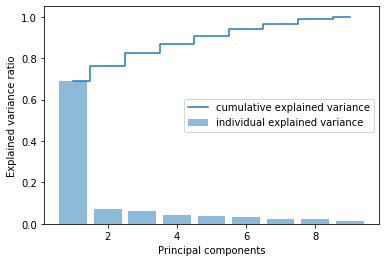

In [51]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
sns.pairplot()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [55]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(bc_df_analysis)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.components_

array([[ 0.29790598,  0.40288343,  0.39036924,  0.33486161,  0.24788681,
         0.43846304,  0.29337155,  0.35940496,  0.12441877],
       [-0.07834808,  0.22830231,  0.16909421, -0.10691758,  0.18578596,
        -0.78277369,  0.02271213,  0.47756049,  0.16088652],
       [-0.85683651, -0.01508952, -0.06620179,  0.47574671,  0.06563439,
         0.09229095,  0.09795858,  0.10737837,  0.03056792],
       [ 0.11349478,  0.26033305,  0.17336622,  0.43812425,  0.17216447,
        -0.32754148, -0.03922063, -0.72815635,  0.16930143],
       [ 0.35757784, -0.380397  , -0.41011346,  0.56125503, -0.10210995,
        -0.10435281, -0.17300301,  0.27209769,  0.34489536],
       [-0.14500322, -0.01086168, -0.00551808, -0.31263819,  0.43183818,
         0.24978568, -0.43434565, -0.04832997,  0.66423939],
       [-0.03007501,  0.18236044,  0.36110334,  0.18126917, -0.32908635,
         0.05077907, -0.78748706,  0.14505221, -0.22479697],
       [ 0.09070937, -0.1042574 , -0.20233606,  0.10440176,  0

In [57]:
df_comp=pd.DataFrame(pca.components_,columns=list(bc_df_analysis))
df_comp.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.297906,0.402883,0.390369,0.334862,0.247887,0.438463,0.293372,0.359405,0.124419
1,-0.078348,0.228302,0.169094,-0.106918,0.185786,-0.782774,0.022712,0.477560,0.160887
2,-0.856837,-0.015090,-0.066202,0.475747,0.065634,0.092291,0.097959,0.107378,0.030568
3,0.113495,0.260333,0.173366,0.438124,0.172164,-0.327541,-0.039221,-0.728156,0.169301
4,0.357578,-0.380397,-0.410113,0.561255,-0.102110,-0.104353,-0.173003,0.272098,0.344895
5,-0.145003,-0.010862,-0.005518,-0.312638,0.431838,0.249786,-0.434346,-0.048330,0.664239
6,-0.030075,0.182360,0.361103,0.181269,-0.329086,0.050779,-0.787487,0.145052,-0.224797
7,0.090709,-0.104257,-0.202336,0.104402,0.742906,-0.011128,-0.236613,0.053764,-0.564051
8,0.006572,0.727061,-0.667099,-0.040503,-0.113884,0.056831,-0.087037,0.026807,-0.013577


# Q10 Find correlation between components and features

In [67]:
df_comp.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.038879,-0.007026,0.053072,0.039280,-0.009243,-0.040879,0.018568,0.019342
Cell Size,0.038879,1.000000,0.041019,-0.309852,-0.229326,0.053965,0.238665,-0.108403,-0.112923
Cell Shape,-0.007026,0.041019,1.000000,0.055993,0.041441,-0.009752,-0.043129,0.019589,0.020406
Marginal Adhesion,0.053072,-0.309852,0.055993,1.000000,-0.313044,0.073665,0.325793,-0.147976,-0.154147
Single Epithelial Cell Size,0.039280,-0.229326,0.041441,-0.313044,1.000000,0.054521,0.241124,-0.109519,-0.114086
Bare Nuclei,-0.009243,0.053965,-0.009752,0.073665,0.054521,1.000000,-0.056741,0.025772,0.026847
Normal Nucleoli,-0.040879,0.238665,-0.043129,0.325793,0.241124,-0.056741,1.000000,0.113979,0.118732
Bland Chromatin,0.018568,-0.108403,0.019589,-0.147976,-0.109519,0.025772,0.113979,1.000000,-0.053929
Mitoses,0.019342,-0.112923,0.020406,-0.154147,-0.114086,0.026847,0.118732,-0.053929,1.000000


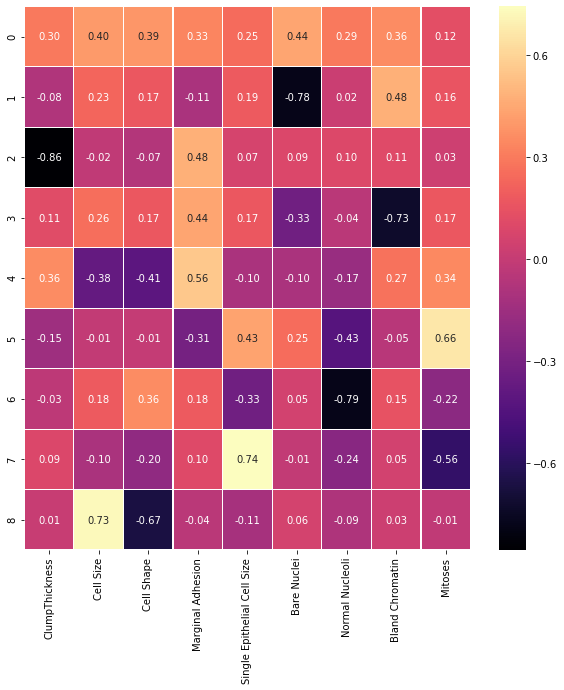

In [65]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df_comp, ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [151]:
ratings=pd.read_csv("jokes.csv")

In [152]:
ratings.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [153]:
ratings=ratings.iloc[:200,1:]

In [154]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [155]:
ratings.replace(99.0,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [156]:
ratings.shape

(200, 100)

In [157]:
ratings_diff=ratings.describe().T

In [158]:
ratings_diff.sort_values("mean", axis = 0, ascending = False,inplace = True, na_position ='first')

In [161]:
top_ratings=ratings_diff['mean'] #Storing the mean of all Joke ID's in top_ratings

In [165]:
top_ratings.head(10) #Priting the top 10 Joke IDs

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64